# Introduccion al Marketing

## Importancia
- Conocimiento cliente.
- ROI.
- Personalizacion de experiencias.
- Efectividad de las campañas.

## Terminos clave
- Funnel de conversion.
- Segmentacion de mercado.
- Customer Lifetime Value (CLV) (50€ * 1 vez al mes * 24 meses).
- Retencion y Churn.

## Ejemplos
- Personalizacion de campañas.
- Optimizar presupuestos publicitarios.
- Efectividad de las campañas.

# Metricas claves de Marketing
## 1. KPI`s de Adquisicion (Enfocados a atraer nuevos clientes)
### CAC (Costo de adquisicion del cliente)
$$
\text{CAC} = \frac{\text{Total \, invertido \, en \, marketing \, y \, ventas}}{\text{Numero \, de \, nuevos \, clientes \, adquiridos}}
$$

### CTR(Clics por impresion)
$$
\text{CTR} {\%}= \frac{\text{Clics \, en \, el \, anuncio}}{\text{Impresiones \, totales}} \times 100
$$

### CPC (Costo poe click)
$$
\text{CPC} = \frac{\text{Costo \, total \, de \, la \, campaña}}{\text{Numero \, de \, clics}}
$$

## 2. KPI's de Conversion (Miden el rendimiento de las ventas y acciones clave)
### Tasa de conversion
$$
\text{Tasa \, de \, conversion (\%)} = \frac{\text{Numero \, de \, conversiones}}{\text{Numero \, de \, visitantes \, unicos}} \times 100
$$

### ROAS (Rentabilidad de la inversion en publicidad)
$$
\text{ROAS} = \frac{\text{Ingresos \, generados \, por \, la \, campaña}}{\text{Inversion \, publicitaria}}
$$

## 3. KPI's de Retencion (analizan el comportamiento de los clientes YA existentes)
### Tasa de churn (Abandono)
$$
\text{Tasa \, de \, churn(\%)} = \frac{\text{Numero \, de \, clientes \, perdidos \, en \, un \, periodo}}{\text{Numero \, total \, de \, clientes \, al \, inicio \, de \, periodo}} \times 100
$$

### Tasa de Retencion (Mantener al cliente)
$$
\text{Tasa \, de \, retencion(\%)} = {\text{100}} - {\text{Tasa \, de \, churn(\%)}}
$$

### CLV (Valor que genera el cliente)
$$
\text{CLV} = (\text{Ingreso \, Promedio \, por \, Compra} \times \text{Frecuencia \, de \, compra} \times  \text{Duracion \, del \, Cliente}) \times \text{Margen \, de \, Beneficio}
$$

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import sys
sys.path.append('..')
from src import sp_visualizacion as spv
from src import sp_outliers as so

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/data_limpios.csv')

In [3]:
df.columns

Index(['campaign_id', 'company', 'campaign_type', 'target_audience',
       'channel_used', 'conversion_rate', 'location', 'language',
       'customer_segment', 'date', 'total($)', 'genre', 'ages', 'year',
       'month', 'day_name', 'quarter', 'duration_iterative', 'roi_iterative',
       'clicks_iterative', 'impressions_iterative',
       'engagement_score_iterative'],
      dtype='object')

### Metricas a generar
- CTR
- CPC
- CPM (Costo por mil)
- CPE (Costo por engagement)
- Costo por conversion
- Conversion_Value
- Engagement Rate
- Impresion por Dolar
- Exito de la campaña
- CLV (Impresiones, no clientes)

In [4]:
df['CTR'] = df['clicks_iterative'] / df['impressions_iterative'] # Click Through Rate (CTR)
df['CPC'] = df['total($)'] / df['clicks_iterative'] # Cost Per Click (CPC)
df['CPM'] = df['total($)'] / df['impressions_iterative'] * 1000 # Cost Per Mille (CPM)
df['CPE'] = df['total($)'] / df['engagement_score_iterative'] # Cost Per Engagement (CPE)
df['conversion_cost'] = df['total($)'] / df['conversion_rate'] # Cost Per Conversion (CPC)
df['conversion_value'] = df['conversion_rate'] * df['roi_iterative'] # Conversion Value (CV)
df['engagement_rate'] = df['engagement_score_iterative'] / df['impressions_iterative'] # Engagement Rate (ER)
df['impressions_per_$'] = df['impressions_iterative'] / df['total($)'] # Impressions per Dollar (IP$)
df['is_successful'] = df['roi_iterative'].apply(lambda x: 1 if x > 5 else 0) # Is Successful (IS), 1 true 0 false
df['CLV'] = df['roi_iterative'] * df['conversion_rate'] * df['impressions_iterative'] # Customer Lifetime Value (CLV)

In [5]:
df_metricas = df[['CTR', 'CPC', 'CPM', 'CPE', 'conversion_cost', 'conversion_value', 'engagement_rate', 'impressions_per_$', 'is_successful', 'CLV']]

In [6]:
df_metricas.describe().T

,count,mean,std,min,25%,50%,75%,max
CTR,209915.0000,31.5979,81.1023,0.0000,0.0028,0.0208,22.1315,991.0398
CPC,209915.0000,13.6441,23.6583,0.0050,0.0248,0.0626,19.8270,199.6100
CPM,209915.0000,1438.7044,2406.3710,0.0501,0.2396,0.6772,2086.0140,19896.1039
CPE,209915.0000,1791.2706,2995.4979,4.9525,176.6705,595.9091,2047.6667,20000.0000
conversion_cost,209915.0000,242384.5703,262389.6238,33062.7063,102503.5361,154720.2274,266351.9566,2000000.0000
conversion_value,209915.0000,2.2241,2.4109,0.0200,0.4143,1.1232,3.3333,13.3320
engagement_rate,209915.0000,0.0089,0.0458,0.0000,0.0000,0.0000,0.0030,1.0080
impressions_per_$,209915.0000,2531.8867,3278.5355,0.0503,0.4794,1476.5682,4173.4071,19946.0950
is_successful,209915.0000,0.7941,0.4044,0.0000,1.0000,1.0000,1.0000,1.0000
CLV,209915.0000,60861708.2602,121587348.7114,25.3422,7171.4018,6506798.6148,61959384.1886,1164259229.5695


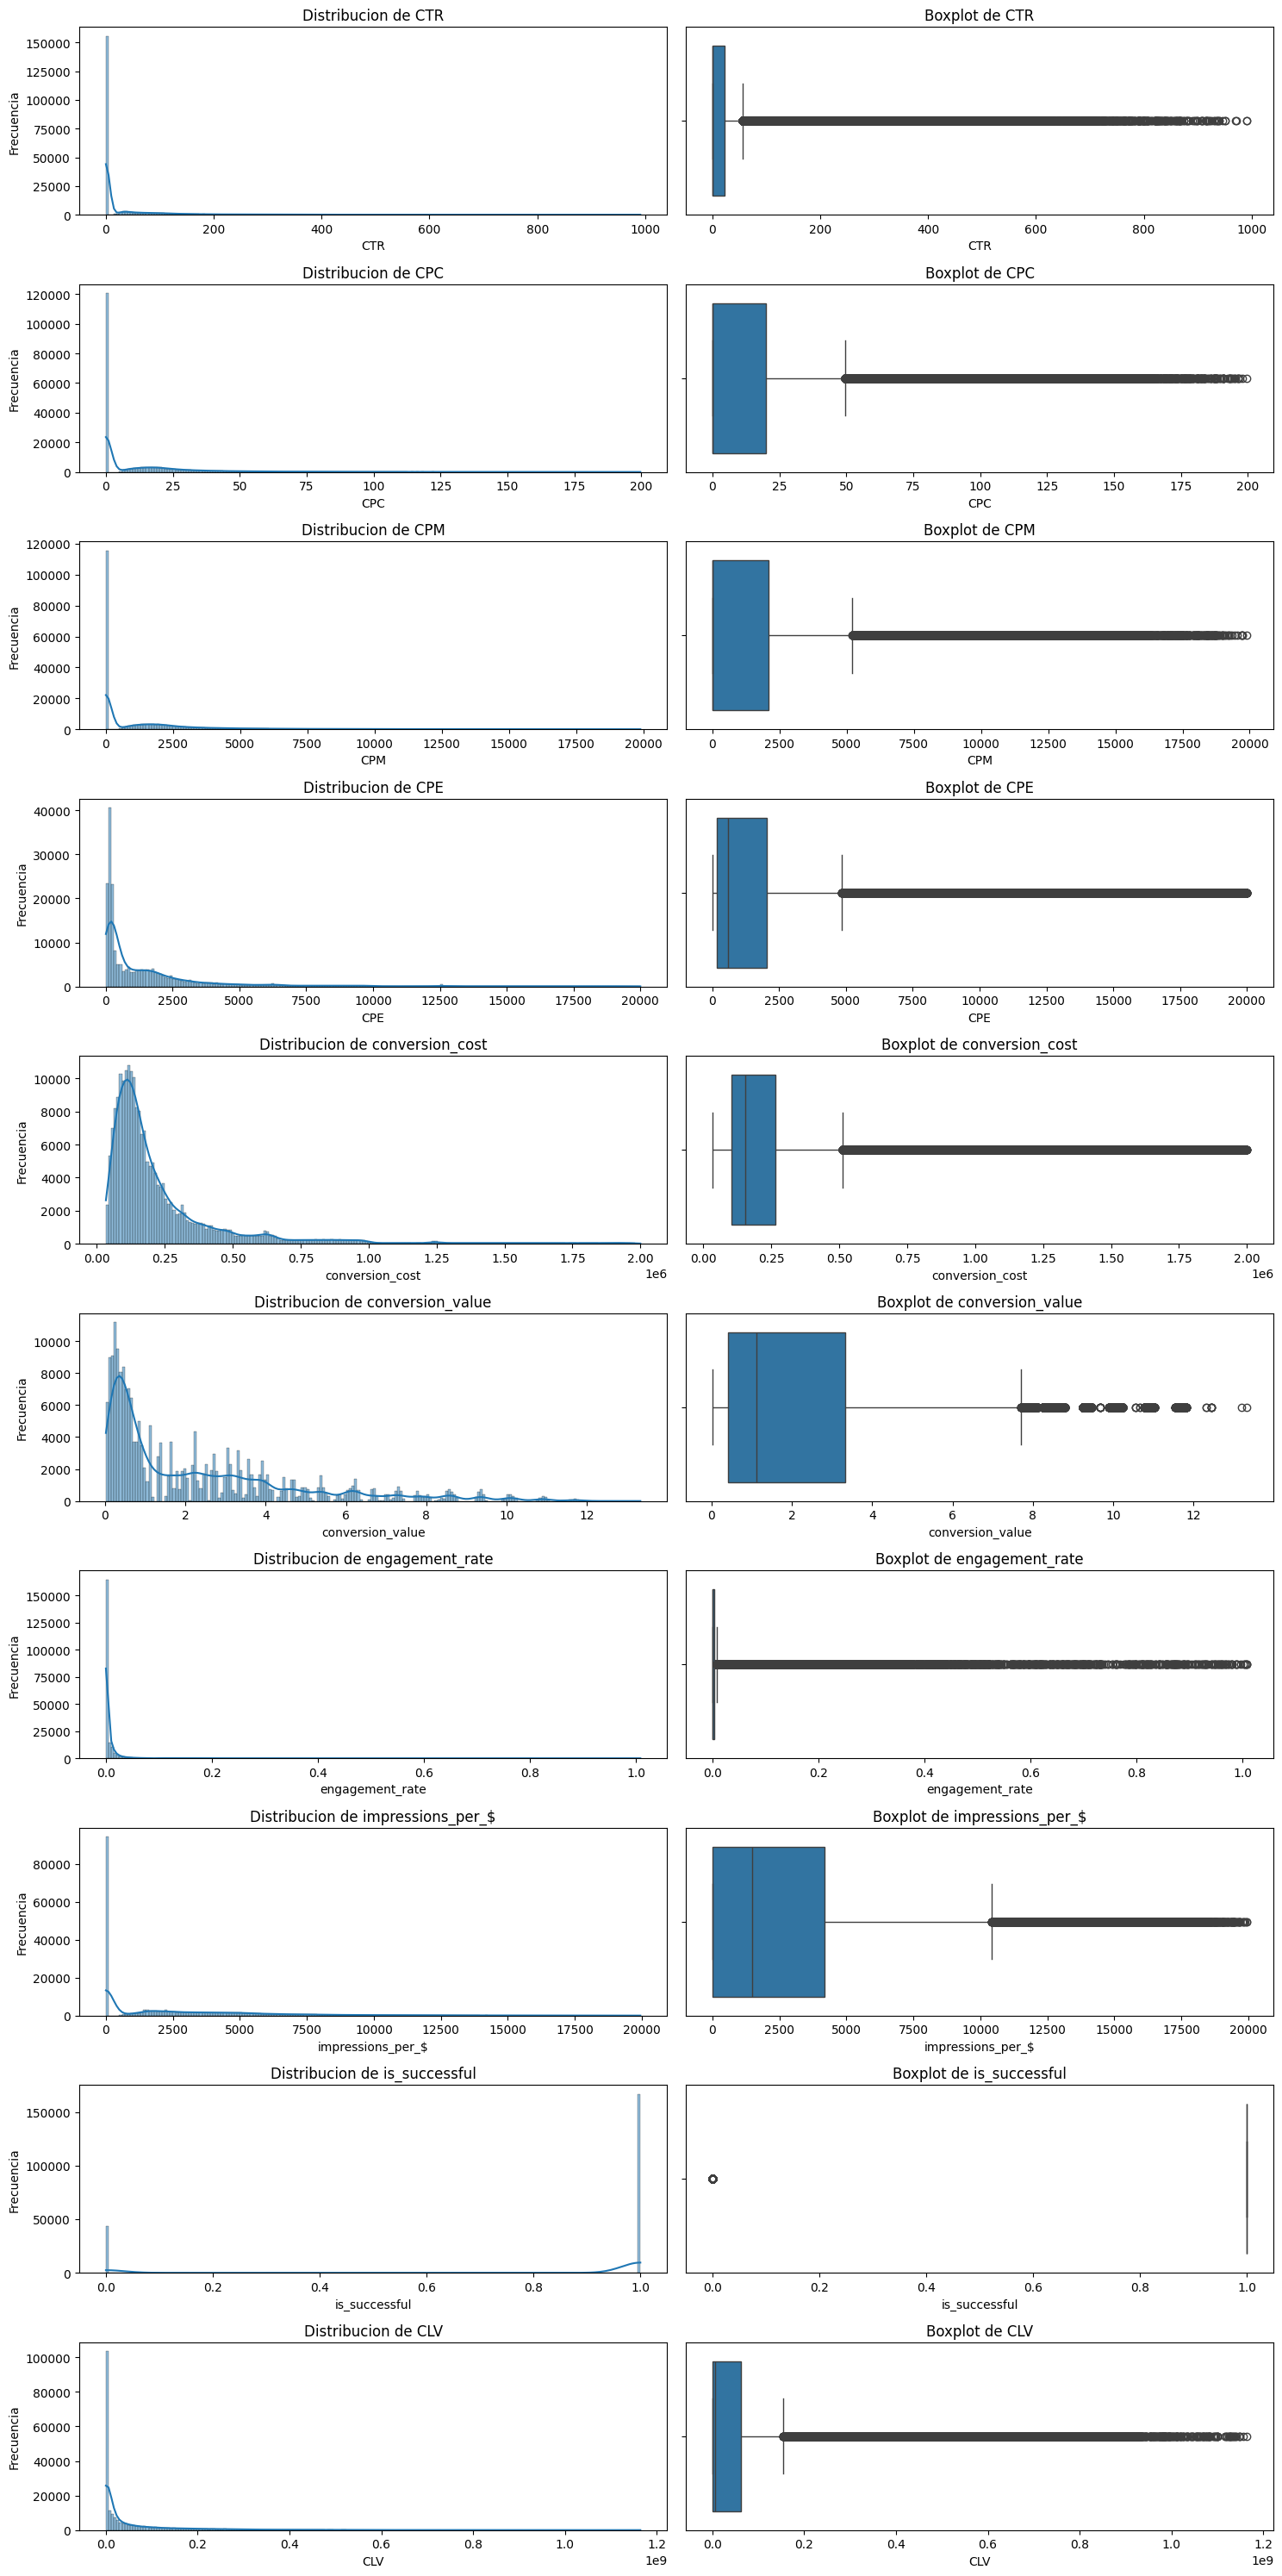

In [7]:
spv.subplot_col_num(df_metricas, df_metricas.columns)

In [8]:
df.to_csv('../data/data_metricas.csv', index=False) # Guardamos el dataset con las métricas calculadas

# Numero de outlyers en las metricas

In [9]:
#Crear una lista con las columnas que vamos a analizar
columnas_analizar = ['CTR', 'CPC', 'CPM', 'CPE', 'conversion_cost', 'conversion_value', 'engagement_rate', 'impressions_per_$', 'is_successful', 'CLV']
so.count_outliers(df, columnas_analizar) # Contamos los outliers de cada columna, funcion desde el script sp_outliers.py

({'CTR': 36952,
  'CPC': 15212,
  'CPM': 14683,
  'CPE': 19489,
  'conversion_cost': 20469,
  'conversion_value': 10367,
  'engagement_rate': 39059,
  'impressions_per_$': 7365,
  'is_successful': 43229,
  'CLV': 27615},
 {'CTR': 0.176,
  'CPC': 0.072,
  'CPM': 0.07,
  'CPE': 0.093,
  'conversion_cost': 0.098,
  'conversion_value': 0.049,
  'engagement_rate': 0.186,
  'impressions_per_$': 0.035,
  'is_successful': 0.206,
  'CLV': 0.132})

# Analisis de las metricas

In [10]:
def filter_no_outliers(data, lista_columnas):
  data_filtered = data.copy()
  for col in lista_columnas:
    Q1 = data[col].quantile(0.25) # Primer cuartil
    Q3 = data[col].quantile(0.75) # Tercer cuartil
    IQR = Q3 - Q1 # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR # Límite inferior
    upper_bound = Q3 + 1.5 * IQR # Límite superior
    data_filtered = data_filtered[(data_filtered[col] >= lower_bound) & (data_filtered[col] <= upper_bound)]
  return data_filtered

In [11]:
#Separar el df en tres:
df_completo = df.copy()
df_no_outliers = filter_no_outliers(df_completo, columnas_analizar)
df_only_outliers = df_completo[~df_completo.index.isin(df_no_outliers.index)]

In [12]:
df_completo.shape[0], df_no_outliers.shape[0], df_only_outliers.shape[0]

(209915, 60621, 149294)

## CTR

CTR promedio por campaña:
campaign_type
unknown        4.1717
search         3.8804
email          3.8070
social_media   3.7615
influencer     3.7534
display        3.7336
Name: CTR, dtype: float64 

CTR promedio por canal:
channel_used
unknown      3.9198
instagram    3.8808
google_ads   3.8589
facebook     3.8423
website      3.8307
email        3.7542
youtube      3.6892
Name: CTR, dtype: float64 



c:\Users\Adrian\OneDrive\Data Analyst\13.- Proyectos\EDA Marketing (Análisis exploratorio del Dato)\EDA_Marketing\jupyters\..\src\sp_visualizacion.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(ctr_by_campaign.index, rotation=45)
c:\Users\Adrian\OneDrive\Data Analyst\13.- Proyectos\EDA Marketing (Análisis exploratorio del Dato)\EDA_Marketing\jupyters\..\src\sp_visualizacion.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(ctr_by_channel.index, rotation=45)


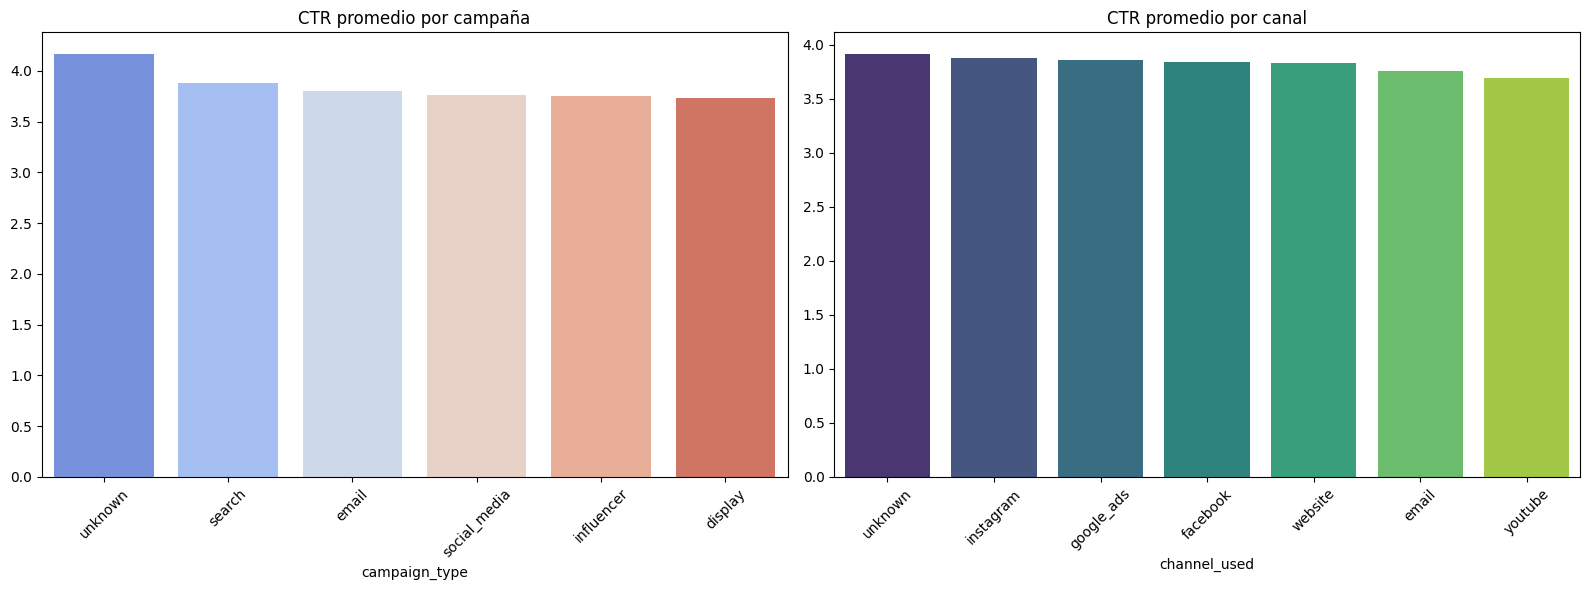

In [13]:
spv.analyze_ctr_without_outliers(df_no_outliers, no_outliers=True)

CTR promedio por campaña:
campaign_type
display        0.0384
social_media   0.0378
unknown        0.0360
search         0.0358
influencer     0.0355
email          0.0354
Name: CTR, dtype: float64 

CTR promedio por canal:
channel_used
youtube      0.0381
google_ads   0.0373
facebook     0.0369
email        0.0366
instagram    0.0361
website      0.0361
unknown      0.0341
Name: CTR, dtype: float64 



c:\Users\Adrian\OneDrive\Data Analyst\13.- Proyectos\EDA Marketing (Análisis exploratorio del Dato)\EDA_Marketing\jupyters\..\src\sp_visualizacion.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(ctr_by_campaign.index, rotation=45)
c:\Users\Adrian\OneDrive\Data Analyst\13.- Proyectos\EDA Marketing (Análisis exploratorio del Dato)\EDA_Marketing\jupyters\..\src\sp_visualizacion.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(ctr_by_channel.index, rotation=45)


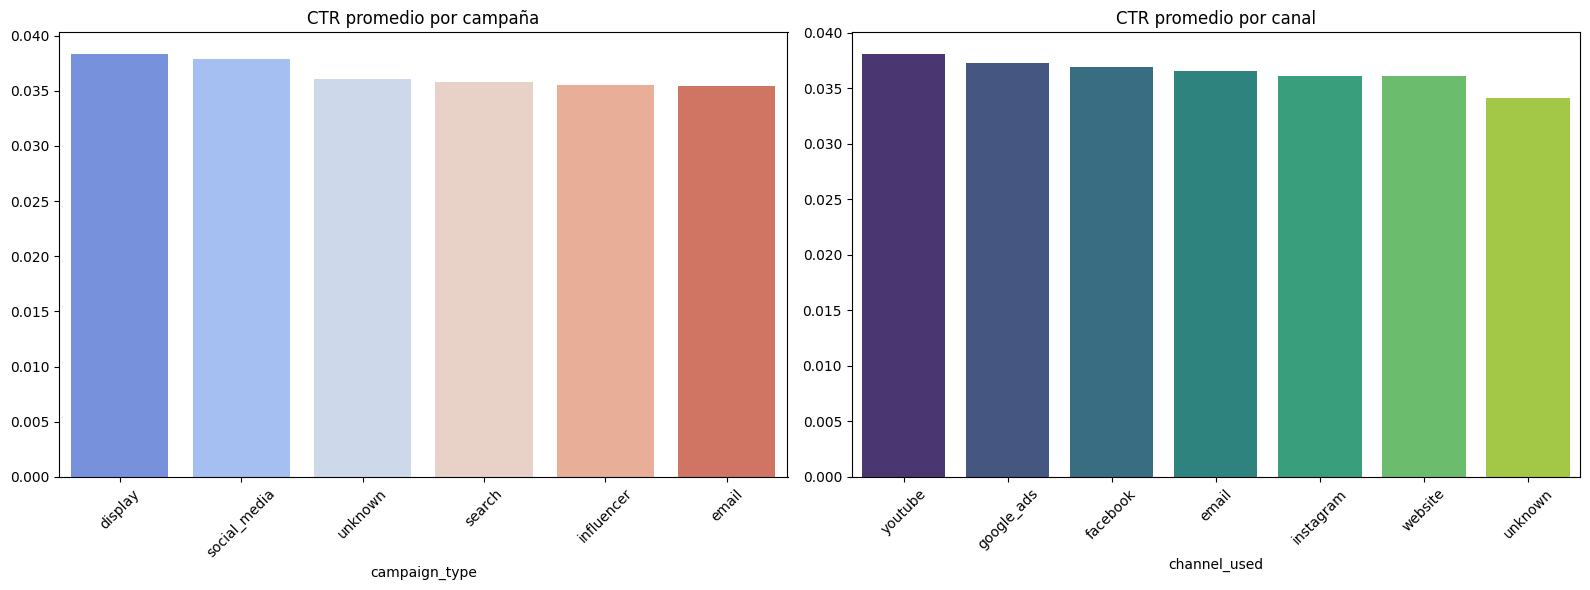

In [14]:
spv.analyze_ctr_without_outliers(df_only_outliers)

Conversion_cost promedio por canal utilizado
channel_used
website      187168.9733
facebook     186876.6451
youtube      186651.2135
email        186067.3360
instagram    186008.2355
google_ads   184361.3296
unknown      182515.1609
Name: conversion_cost, dtype: float64 

Conversion_cost promedio por segmento de cliente
customer_segment
unknown               189308.7075
fashionistas          186808.3355
outdoor_adventurers   186562.8441
tech_enthusiasts      186151.7467
health_&_wellness     184977.2060
foodies               183270.2330
Name: conversion_cost, dtype: float64 

Conversion_value promedio por canal utilizado
channel_used
youtube      2.0003
facebook     1.9924
unknown      1.9879
website      1.9802
email        1.9800
google_ads   1.9744
instagram    1.9565
Name: conversion_value, dtype: float64 

Conversion_value promedio por segmento de cliente
customer_segment
foodies               1.9942
tech_enthusiasts      1.9935
unknown               1.9894
outdoor_adventurers   1

c:\Users\Adrian\OneDrive\Data Analyst\13.- Proyectos\EDA Marketing (Análisis exploratorio del Dato)\EDA_Marketing\jupyters\..\src\sp_visualizacion.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_by_channel.index, y=metric_by_channel.values, palette='muted', ax=axs[0])
c:\Users\Adrian\OneDrive\Data Analyst\13.- Proyectos\EDA Marketing (Análisis exploratorio del Dato)\EDA_Marketing\jupyters\..\src\sp_visualizacion.py:133: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(metric_by_channel.index, rotation=45)
c:\Users\Adrian\OneDrive\Data Analyst\13.- Proyectos\EDA Marketing (Análisis exploratorio del Dato)\EDA_Marketing\jupyters\..\src\sp_visualizacion.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is de

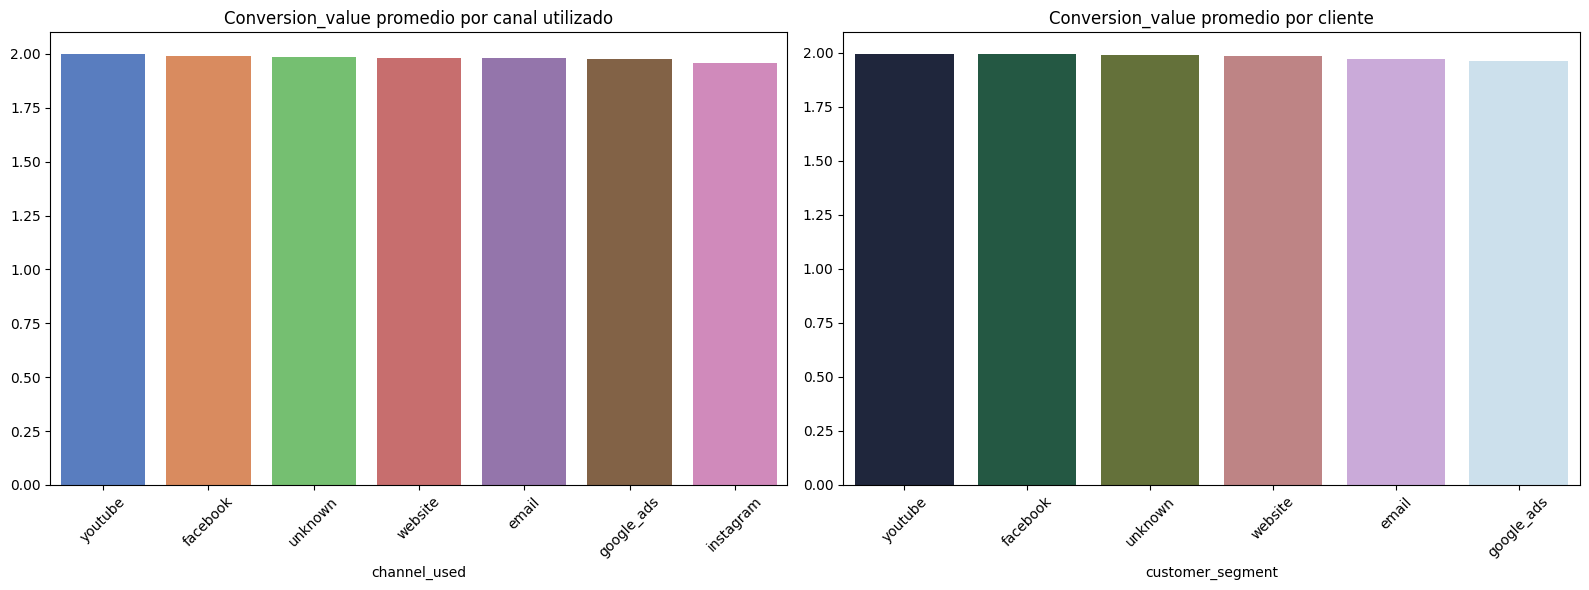

In [15]:
spv.analyze_conversion_metrics(df_no_outliers, True)